In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
df['job_posted_month']=df.job_posted_date.dt.strftime('%B')
df_usa = df[df['job_country']=='United States']
df_US_pivot = df_usa.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [ ]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)

In [19]:
top_job = df_usa['job_title_short'].value_counts().head(3).index.tolist()
data_jobs = df_US_pivot[top_job]

In [24]:
software_jobs = pd.read_csv("https://lukeb.co/software_csv").set_index('job_posted_month')

In [27]:
df_US_merged = data_jobs.merge(software_jobs,on='job_posted_month')

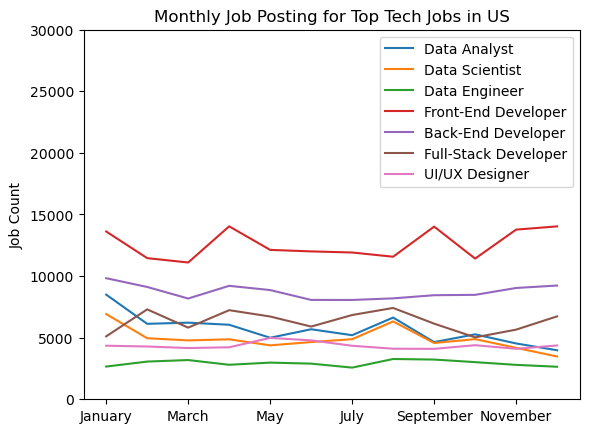

In [31]:
df_US_merged.plot(kind='line')
plt.title('Monthly Job Posting for Top Tech Jobs in US')
plt.xlabel('')
plt.ylabel('Job Count')
plt.legend()
plt.ylim(0,30000)
plt.show()